# Introductory Tutorial

## Getting started

You should be familiar with how [Mesa](https://github.com/projectmesa/mesa) works.

So let's get started with some geometries! We will work with [records of US states](http://eric.clst.org/Stuff/USGeoJSON). We use the `requests` library to retrieve the data, but of course you can work with local data.

In [1]:
import warnings

warnings.filterwarnings("ignore")

import mesa
import mesa_geo as mg
import requests


url = "http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_20m.json"
r = requests.get(url)
geojson_states = r.json()

First we create a `State` Agent and a `GeoModel`. Both should look familiar if you have worked with Mesa before.

In [2]:
class State(mg.GeoAgent):
    def __init__(self, unique_id, model, geometry, crs):
        super().__init__(unique_id, model, geometry, crs)


class GeoModel(mesa.Model):
    def __init__(self):
        self.space = mg.GeoSpace()

        ac = mg.AgentCreator(agent_class=State, model=self)
        agents = ac.from_GeoJSON(GeoJSON=geojson_states, unique_id="NAME")
        self.space.add_agents(agents)

In the `GeoModel` we first create an instance of AgentCreator, where we provide the Agent class (State) and its required arguments, except geometry and unique_id. We then use the `.from_GeoJSON` function to create our agents from the geometries in the GeoJSON file. We provide the feature "name" as the key from which the agents get their unique_ids.
Finally, we add the agents to the GeoSpace

Let's instantiate our model and look at one of the agents:

Arizona


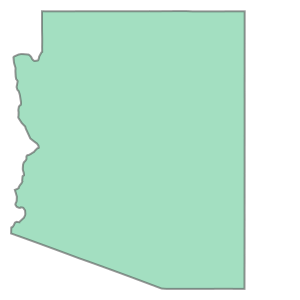

In [3]:
m = GeoModel()

agent = m.space.agents[0]
print(agent.unique_id)
agent.geometry

If you work in the Jupyter Notebook your output should give you the name of the state and a visual representation of the geometry.

By default the AgentCreator also sets further agent attributes from the Feature properties.

In [4]:
agent.CENSUSAREA

113594.084

Let's start to do some spatial analysis. We can use usual Mesa function names to get neighboring states.

In [5]:
neighbors = m.space.get_neighbors(agent)
print([a.unique_id for a in neighbors])

['California', 'Colorado', 'Utah', 'Nevada', 'New Mexico']


To get a list of all states within a certain distance you can use the following:

In [6]:
[a.unique_id for a in m.space.get_neighbors_within_distance(agent, 600000)]

['California',
 'Nevada',
 'Arizona',
 'Utah',
 'Wyoming',
 'New Mexico',
 'Colorado',
 'Texas']

The unit for the distance depends on the coordinate reference system (CRS) of the GeoSpace. Since we did not specify the CRS, Mesa-Geo defaults to the 'Web Mercator' projection (in meters). If you want to do some serious measurements you should always set an appropriate CRS, since the accuracy of Web Mercator declines with distance from the equator.  We can achieve this by initializing the AgentCreator and the GeoSpace with the `crs` keyword  `crs="epsg:2163"`. Mesa-Geo then transforms all coordinates from the GeoJSON geographic coordinates into the set crs.

## Going further

To get a deeper understanding of Mesa-Geo you should check out the [GeoSchelling](https://github.com/projectmesa/mesa-geo/tree/main/examples/geo_schelling) example. It implements a Leaflet visualization which is similar to use as the CanvasGridVisualization of Mesa.

To add further functionality, I need feedback on which functionality is desired by users. Please post a message at [Mesa-Geo discussions](https://github.com/projectmesa/mesa-geo/discussions) or open an [issue](https://github.com/projectmesa/mesa-geo/issues) if you have any ideas or recommendations.